In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm
import numpy as np
# from em_utilities import get_loop_sim, JBPlotter
from geoana.em.tdem import simple_functions
from ipywidgets import interact, IntSlider
from IPython.display import display
from geoana.em.tdem import VerticalMagneticDipoleHalfSpace

# from simpeg.electromagnetics import time_domain as tdem

plt.rcParams['figure.figsize'] = [6.4, 4.2]
plt.rcParams['figure.dpi'] = 300

# Processing & Interpretations

* Recap of lab
* Processing
* Simple interpretation techniques

# Processing
* Often not much to be done to TDEM data
* Most processing time is spent adequately cataloging your data
* Some things you might have to do though:

> **Remember** Rx antenna measures a voltage
> $$ V = \int_A -\frac{\partial B}{\partial t} dA$$

### Simple corrections
When a coil measures voltages, and what you want as data is $\frac{\partial B}{\partial t}$:

* Signal has been gained, so need to divide recorded voltage by the gain (if not already done by other software)

$$ -\frac{db}{dt} = \frac{V}{gain ...} $$
$$ gain = 2^{n} * gain_{pre amp} * gain_{other} * ...$$

* Signal should be normalized by Rx area

$$ -\frac{db}{dt} = \frac{V}{gain * area} $$

* Depending on what software you use to interpret the data, you might need to also normalize by the current.

$$ -\frac{db}{dt} = \frac{V}{gain * area * current} $$

* Then if you want dbdt, account for the negative:

$$ \frac{db}{dt} = -\frac{V}{gain * area * current} $$

Effectively giving us a measurement with units of $V / (m^2 A)$, or a normalized rate of flux change.

## Simple interpretations

### Apparent Conductivities
There is an apparent conductivity defined for central loop soundings:

From central loop soundings:

* Recall the $-\frac{dB}{dt}$ curves for different resistivities.

In [2]:
def do_db_plot():
    ts = np.logspace(-8,-2)
    bz2 = simple_functions.vertical_magnetic_flux_time_deriv_horizontal_loop(ts, sigma=0.1)
    plt.plot(ts, -bz2, label=r'$\sigma=0.1$')
    
    bz1 = simple_functions.vertical_magnetic_flux_time_deriv_horizontal_loop(ts, sigma=1)
    plt.plot(ts, -bz1, label=r'$\sigma=1$')
    
    bz3 = simple_functions.vertical_magnetic_flux_time_deriv_horizontal_loop(ts, sigma=10)
    plt.plot(ts, -bz3, label=r'$\sigma=10$')
    
    plt.xlabel('time (s)')
    plt.ylabel('-dB/dt (T/s)')
    plt.title('Magnetic flux density time derivative at the center of the transmitter loop')
    ax = plt.gca()
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    plt.legend()

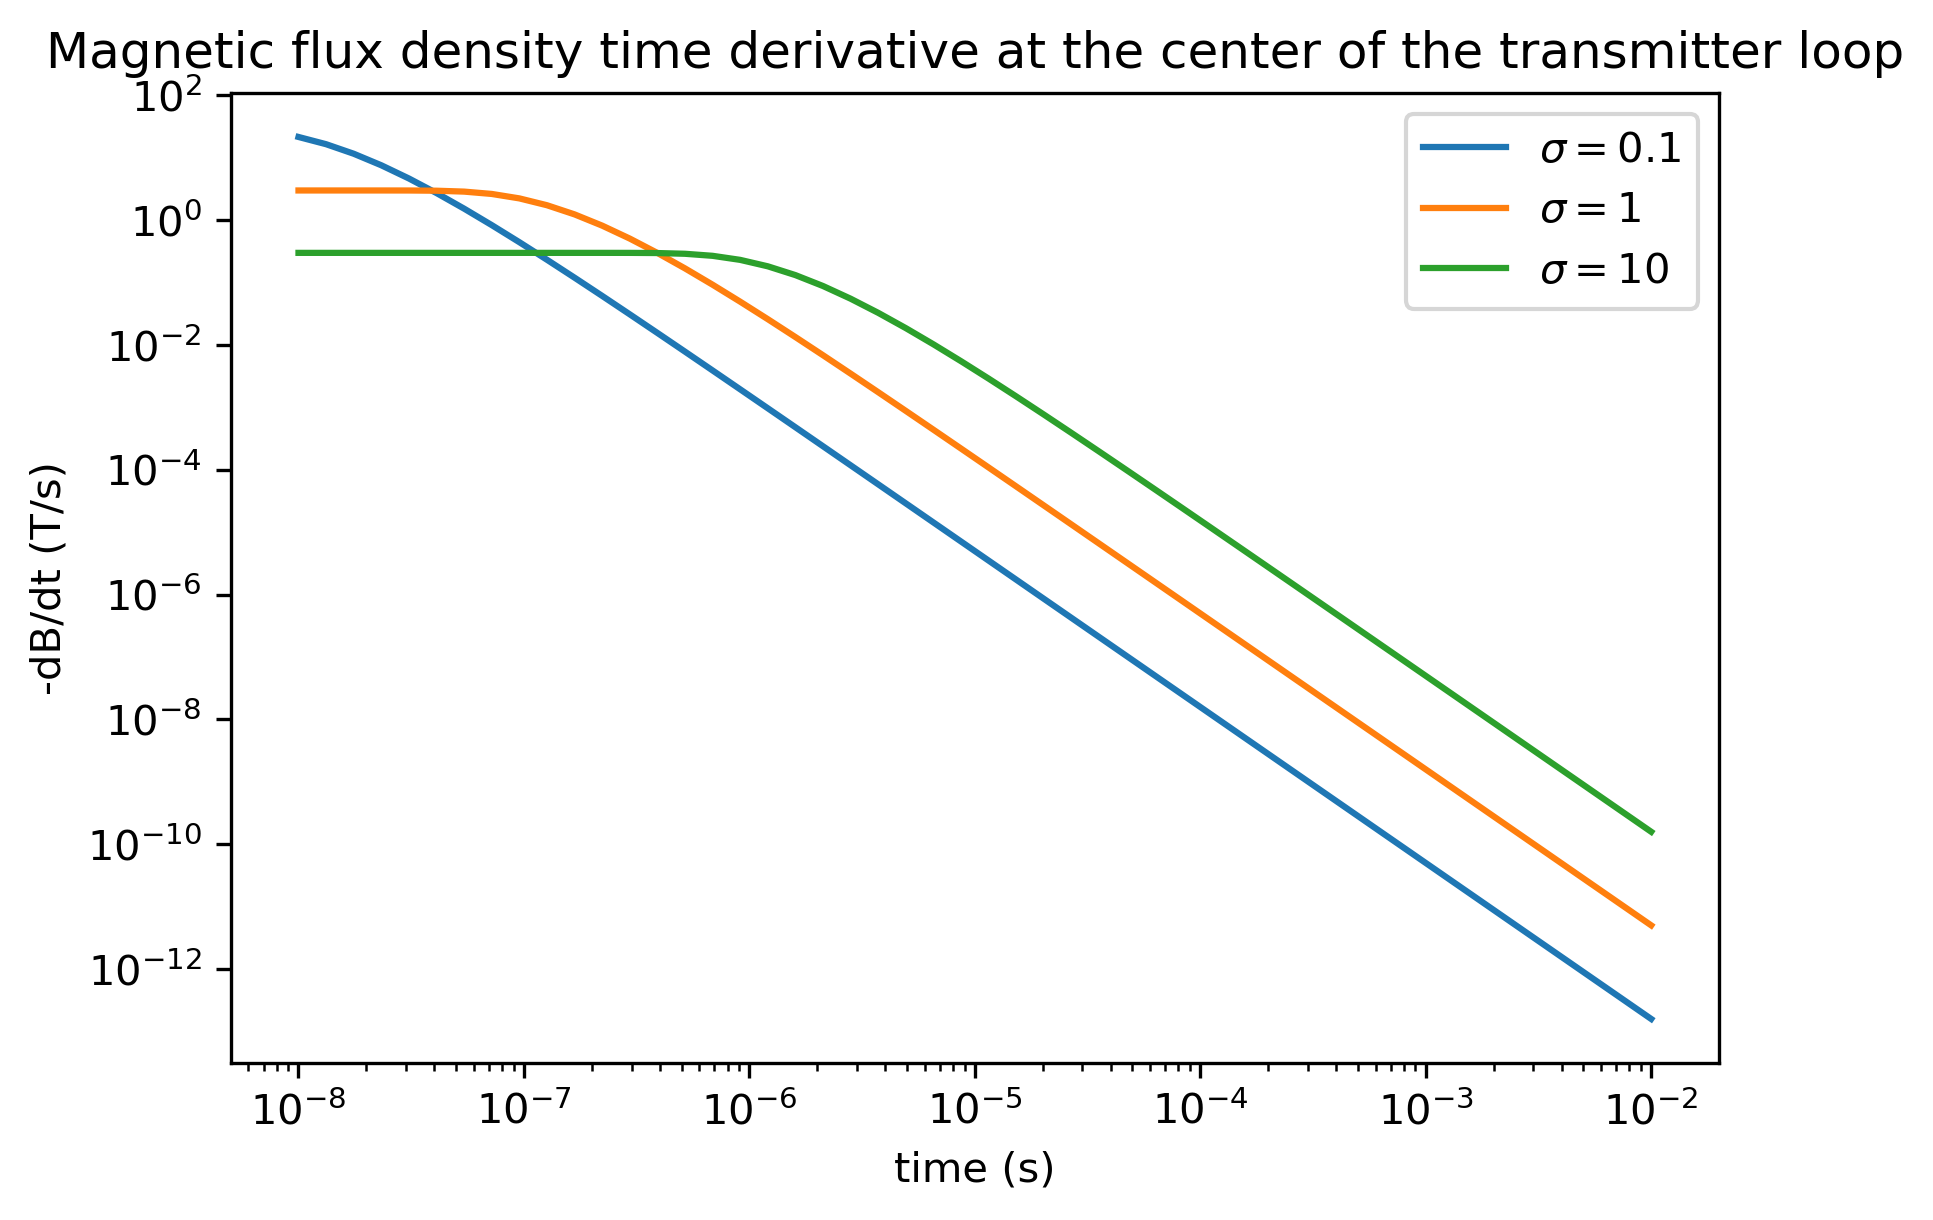

In [3]:
do_db_plot()

* You might notice that at later times, these curves all have the same slope on a log-log plot for a halfspace!

* It turns out they have an assymptote at late times as:

\begin{equation}
v(t) \approx \frac{M}{20}\frac{\mu_0^{5/2} \sigma^{3/2}}{\pi^{3/2} t^{5/2}}
\end{equation}

* Where $M$ is the moment of the transmitter (Current * area)

In [4]:
from scipy.constants import mu_0
def db_dt_assymptote(ts, sigma, moment=np.pi):
    return moment * np.sqrt(sigma**3 * mu_0**5 / (np.pi**3 * ts**5)) / 20

def do_db_assym_plot():
    ts = np.logspace(-8,-2)
    sigma = 0.1
    bz2 = simple_functions.vertical_magnetic_flux_time_deriv_horizontal_loop(ts, sigma=sigma)
    plt.plot(ts, -bz2, label=r'$\sigma=0.1$')
    plt.plot(ts, db_dt_assymptote(ts, sigma, moment=np.pi), linestyle='--', color='C0')

    sigma = 1
    bz1 = simple_functions.vertical_magnetic_flux_time_deriv_horizontal_loop(ts, sigma=sigma)
    plt.plot(ts, -bz1, label=r'$\sigma=1$')
    plt.plot(ts, db_dt_assymptote(ts, sigma, moment=np.pi), linestyle='--', color='C1')

    sigma = 10
    bz3 = simple_functions.vertical_magnetic_flux_time_deriv_horizontal_loop(ts, sigma=sigma)
    plt.plot(ts, -bz3, label=r'$\sigma=10$')
    plt.plot(ts, db_dt_assymptote(ts, sigma, moment=np.pi), linestyle='--', color='C2')
    
    plt.xlabel('time (s)')
    plt.ylabel('-dB/dt (T/s)')
    plt.title('Magnetic flux density time derivative at the center of the transmitter loop')
    ax = plt.gca()
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    plt.legend()

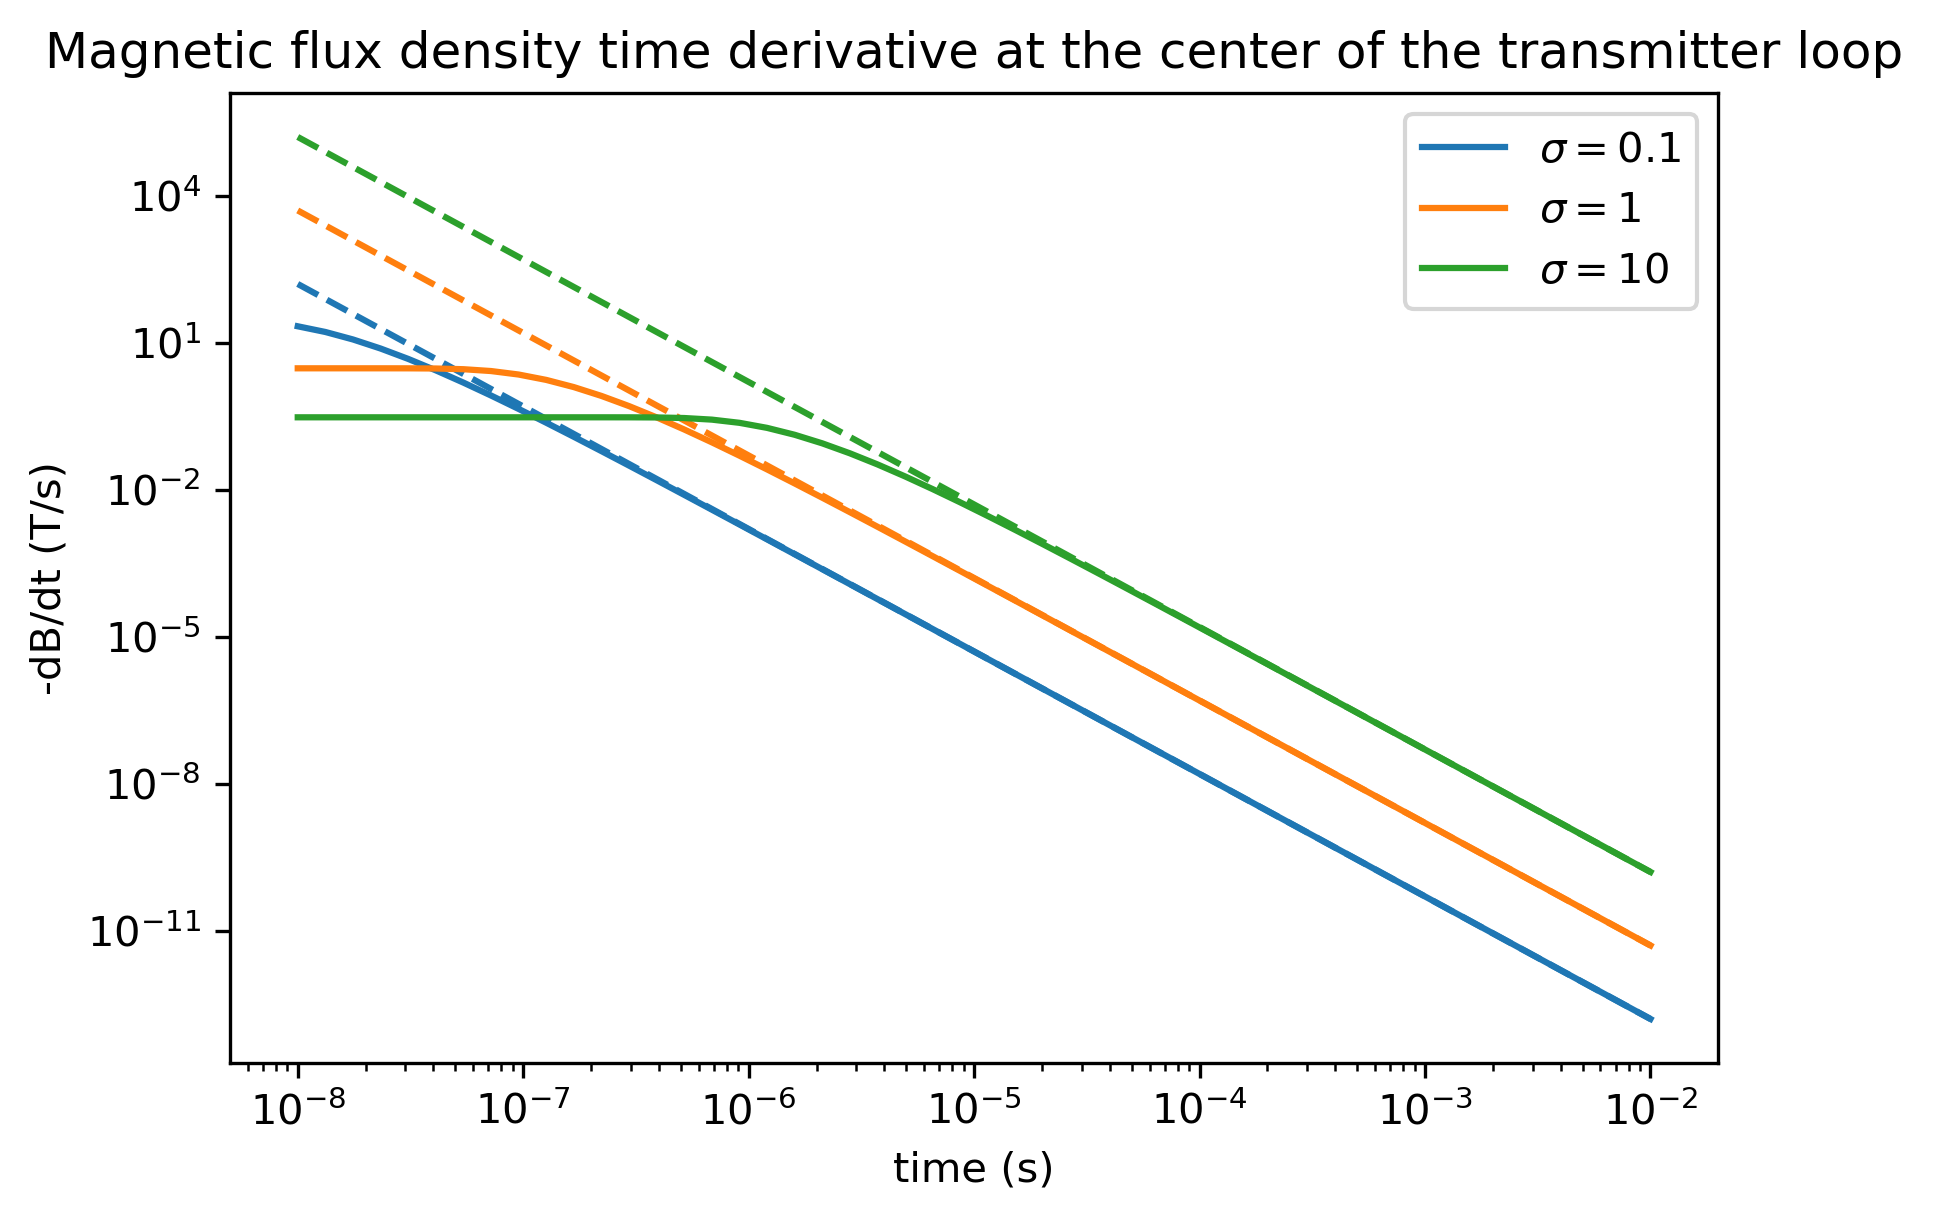

In [5]:
do_db_assym_plot()

* Leads to a term of late-time, apparent conductivty (or resisitity)
* Re-arrange the assymptote equation to solve for $\sigma$:

$$
\sigma_{app, late} = \frac{20^{2/3}V^{2/3} \pi t^{5/3}}{M^{2/3} \mu_0^{5/3}}
$$

### Measurements outside the transmitters

In [19]:
ts = np.logspace(-6, -2, 256)



In [20]:
dbdt = dip.magnetic_field_time_derivative([100, 0])

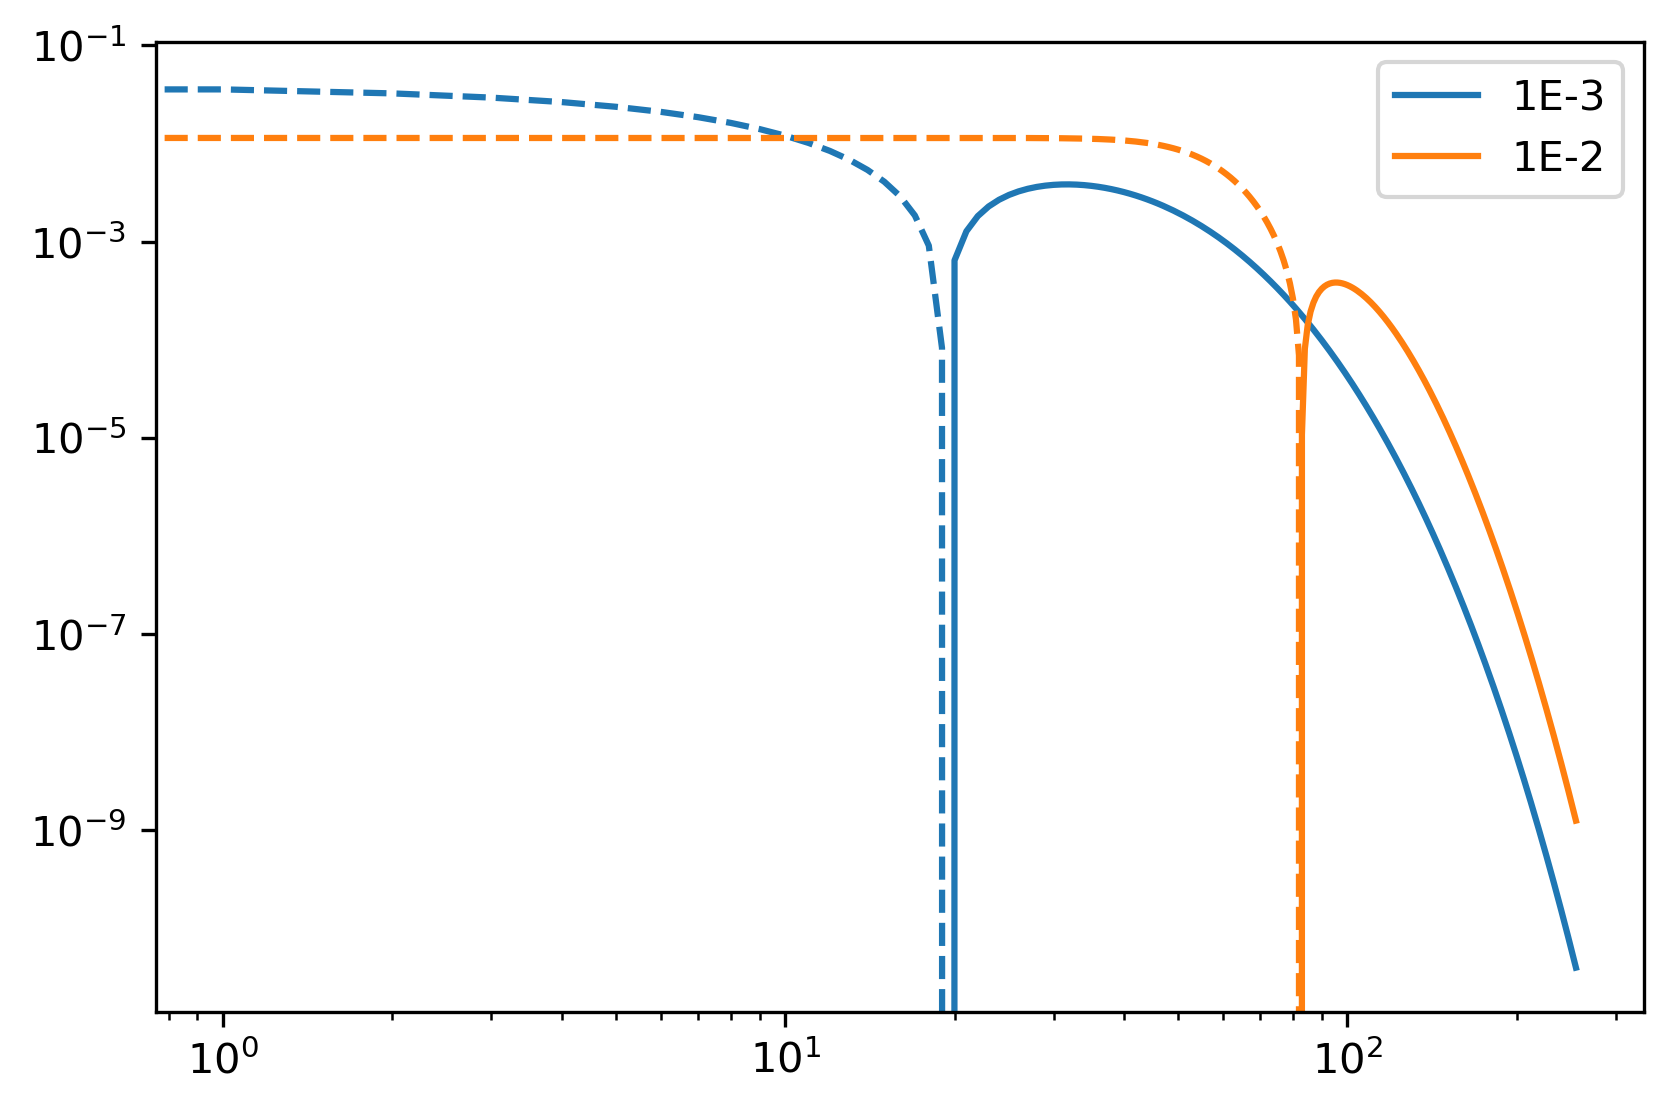

In [28]:
dip = VerticalMagneticDipoleHalfSpace(ts, sigma=1E-3)
dbdt = dip.magnetic_field_time_derivative([100, 0])

plt.loglog(dbdt[:, -1], linestyle='--', color='C0')
plt.loglog(-dbdt[:, -1], color='C0', label='1E-3')

dip = VerticalMagneticDipoleHalfSpace(ts, sigma=1E-2)
dbdt = dip.magnetic_field_time_derivative([100, 0])

plt.loglog(dbdt[:, -1], linestyle='--', color='C1')
plt.loglog(-dbdt[:, -1], color='C1', label='1E-2')
plt.legend()

### The smoke ring
A few more details about the effective circular current filament induced in the subsurface.

In a homogenous halfspace it travels:
* Downward with a velocity of
$$ 
\frac{2}{\sqrt{\pi \sigma \mu_0 t}}
$$
* It's radius, as a function of time:
$$ \sqrt{\frac{4.37 t}{\sigma \mu_0}}$$

> For stronger resistors, the smoke ring travels faster!